<a href="https://colab.research.google.com/github/spentaur/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import scipy.stats as st
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

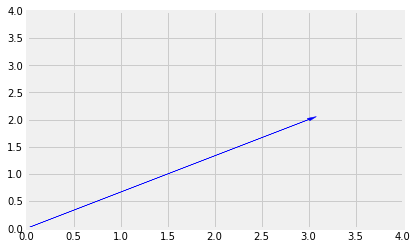

In [8]:
plt.xlim(0,4)
plt.ylim(0,4)
plt.arrow(0, 0, 3, 2, head_width=0.05, head_length=0.1, color="blue")
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [10]:
np.linalg.norm([17, -4, 1])

# represents the distance from center of vector space

17.4928556845359

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [18]:
(3 * 9) + (7 * -7) + (-2 * 4) + (12 * 6) 

# dot product is not 0, not orthogonal

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [30]:
E = np.array([[7, 4, 2],
              [1, 3, -1],
              [2, 6, -4]])

inverse = np.linalg.inv(E)

ET = E.T

print(inverse)
ET

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [39]:
import pandas as pd

customers = np.array([820, 760, 1250, 990, 1080, 1450, 1600])
snow = np.array([0, 1, 7, 1, 0, 6, 4])

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:
##### Your Code Here #####

customers_mean = customers.mean()
customers_var = customers.var(ddof=1)
customers_std = customers.std(ddof=1)

snow_mean = snow.mean()
snow_var = snow.var(ddof=1)
snow_std = snow.std(ddof=1)

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [38]:
customers_var,snow_var

(98761.90476190478, 8.571428571428571)

In [0]:
# not really, they are on entirely different scales

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [52]:
np.cov(customers, snow, ddof=1)

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

In [40]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [53]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [140]:
##### Your Code Here #####

data = df.iloc[:, 1:]
data = (data - data.mean()) / data.std(ddof=0)

data.shape

(4, 17)

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

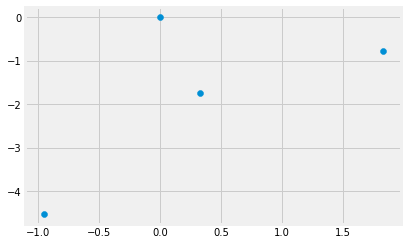

In [142]:
##### Your Code Here #####

from sklearn.decomposition import PCA

pca = PCA()
pc = pca.fit_transform(data)
plt.scatter(pc[0], pc[1])
plt.show()

In [143]:
pc_df = pd.DataFrame(pc)
pc_df

,0,1,2,3
0,-0.954490,0.328318,1.829829,2.031442e-16
1,-4.520951,-1.735380,-0.781412,2.031442e-16
2,0.487978,3.233672,-0.765148,2.031442e-16
3,4.987462,-1.826611,-0.283270,2.031442e-16


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [206]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
pca = PCA()
pc = pca.fit_transform(points)

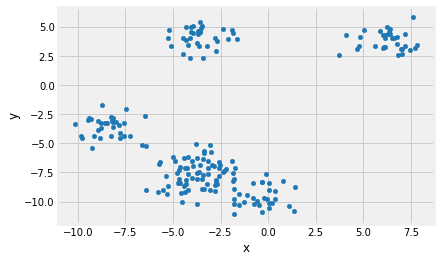

In [209]:
##### Your Code Here #####

points.plot.scatter(x='x', y='y', c="tab:blue");

# 5 clusters

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

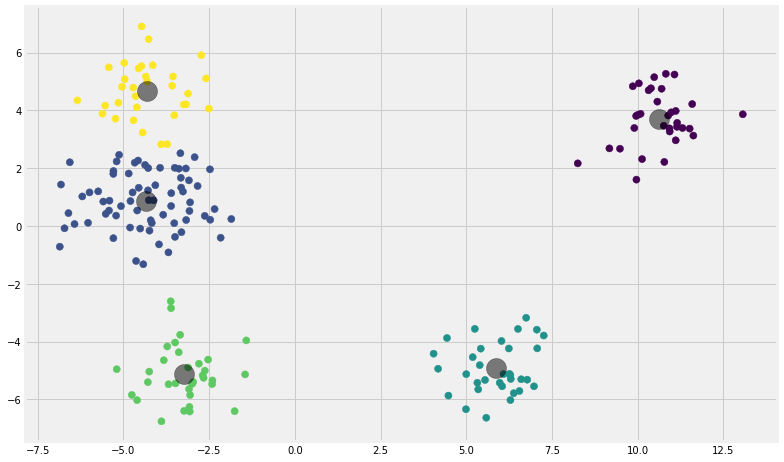

In [211]:
plt.figure(figsize=(12,8))

plt.scatter(pc[:, 0], pc[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.5)

plt.show()

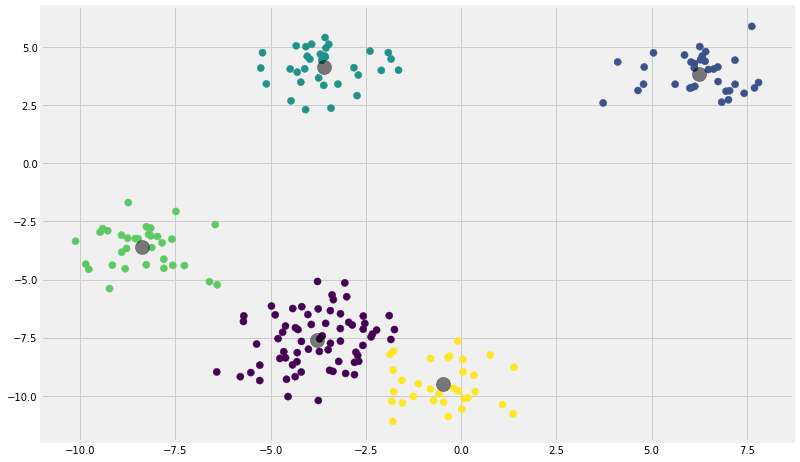

In [218]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(12,8))

plt.scatter(points['x'], points['y'], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

code from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [221]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

X = pc

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(n_clusters, silhouette_avg)


2 0.632028875672798
3 0.6757246576570347
4 0.6990949021213746
5 0.6513720550143952
6 0.5988613282014619
7 0.5859087812896222
8 0.5740382957643515
9 0.5139430220882129
10 0.4470167735884577


In [223]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

X = points

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(n_clusters, silhouette_avg)

2 0.632028875672798
3 0.6757246576570347
4 0.6990949021213746
5 0.6513720550143951
6 0.5989474934414318
7 0.585908781289622
8 0.5186685719912222
9 0.4479439453184537
10 0.40388511636273905


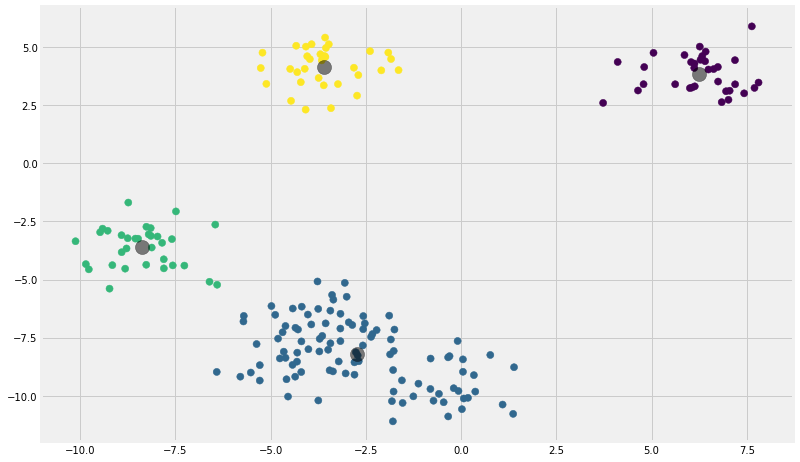

In [224]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(12,8))

plt.scatter(points['x'], points['y'], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()